This notebook develops the example pricing policy using the training data. The example pricing policy is a static pricing policy which has a fixed price for riders originating from each pickup area. The pricing is a 76-dimensional vector, one price for each area. We calculate it here offline and paste the result in `example_policies.py`.

In [1]:
import numpy as np
import pandas as pd

Load the data

In [2]:
# cost parameter
c = 0.7

# load the csv file of training data as a pandas dataframe
df = pd.read_csv('data/training_data.csv')
df

,rider_id,arrival_week,arrival_time,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,pickup_area,dropoff_area,solo_length,quoted_price,convert_or_not,waiting_time,matching_outcome
0,0,1,1.0,41.812949,-87.617860,41.761578,-87.572782,38,43,4.241617,0.554783,1,26.885958,NaN
1,1,1,2.0,41.899737,-87.664954,41.930579,-87.642206,24,7,2.430784,0.494204,1,1.000000,2.0
2,2,1,3.0,41.748211,-87.610075,41.942692,-87.651771,44,6,13.607680,0.514956,1,0.000000,1.0
3,3,1,5.0,41.870607,-87.622173,41.936310,-87.651563,32,6,4.784598,0.516707,1,14.000000,12.0
4,4,1,6.0,41.891972,-87.612945,41.877406,-87.621972,8,32,1.108315,0.379351,1,37.269988,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11783,11783,6,3588.0,41.728669,-87.609006,41.717967,-87.613229,44,49,0.770837,0.714783,0,NaN,NaN
11784,11784,6,3589.0,41.805912,-87.587479,41.898306,-87.653614,39,24,7.234513,0.601732,0,NaN,NaN
11785,11785,6,3593.0,41.813201,-87.604209,41.892042,-87.631864,39,8,5.630267,0.669508,1,0.000000,11774.0
11786,11786,6,3596.0,42.001698,-87.673574,41.972581,-87.694001,1,4,2.268912,0.726485,0,NaN,NaN


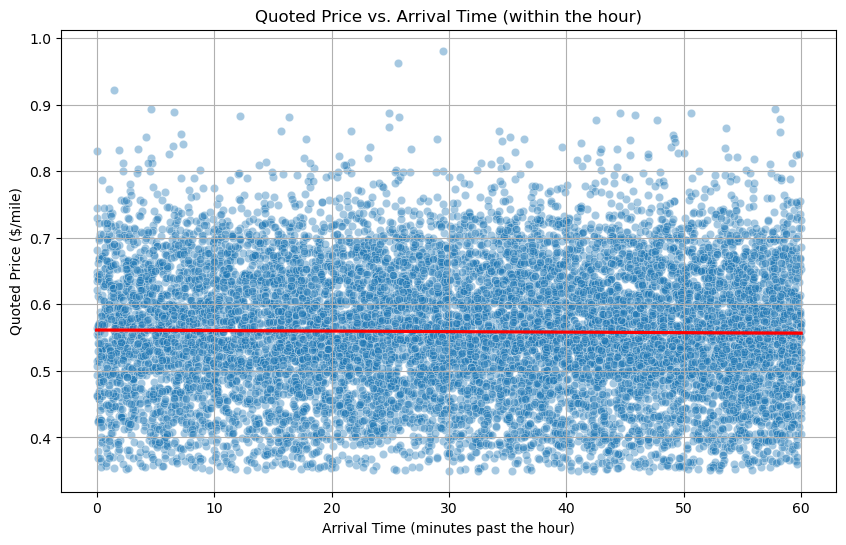

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: convert seconds to minutes for better readability
df['arrival_minute'] = df['arrival_time'] / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='arrival_minute', y='quoted_price', alpha=0.4)
sns.regplot(data=df, x='arrival_minute', y='quoted_price', scatter=False, color='red')
plt.xlabel('Arrival Time (minutes past the hour)')
plt.ylabel('Quoted Price ($/mile)')
plt.title('Quoted Price vs. Arrival Time (within the hour)')
plt.grid(True)
plt.show()


Pearson Correlation (arrival_week vs. quoted_price): -0.02485977942758732
Spearman Correlation: -0.02673368956003405
   arrival_week  quoted_price
0             1      0.560913
1             2      0.562703
2             3      0.560449
3             4      0.555158
4             5      0.558847
5             6      0.553712


C:\Users\emily\AppData\Local\Temp\ipykernel_60676\3621262078.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_week, x='arrival_week', y='quoted_price', palette='Blues')


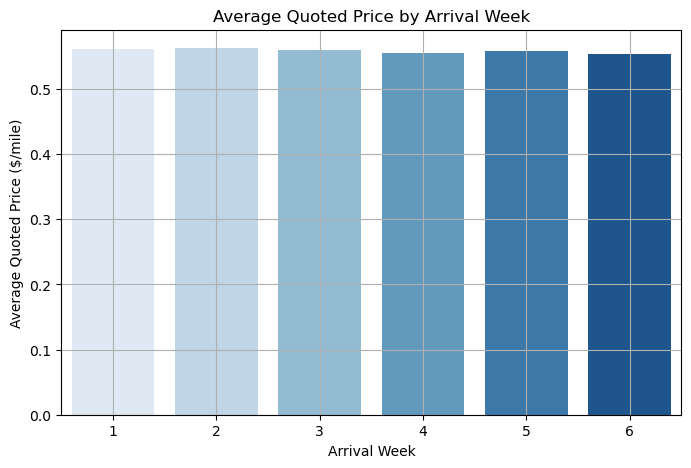

In [10]:
# Pearson correlation (linear)
pearson_corr = df['arrival_week'].corr(df['quoted_price'])
print("Pearson Correlation (arrival_week vs. quoted_price):", pearson_corr)

# Spearman (rank-based) in case the trend is not linear
spearman_corr = df['arrival_week'].corr(df['quoted_price'], method='spearman')
print("Spearman Correlation:", spearman_corr)
avg_price_per_week = df.groupby('arrival_week')['quoted_price'].mean().reset_index()

print(avg_price_per_week)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_per_week, x='arrival_week', y='quoted_price', palette='Blues')
plt.title('Average Quoted Price by Arrival Week')
plt.xlabel('Arrival Week')
plt.ylabel('Average Quoted Price ($/mile)')
plt.grid(True)
plt.show()



Calculate the prices for each pickup area

In [ ]:
# count the demand at each pickup area (i.e., the number of riders originating from each area
pickup_areas_demand = np.array(df.groupby(['pickup_area']).size())

# normalize to [0,1]
pickup_areas_demand_normalized = np.log(pickup_areas_demand)/max(np.log(pickup_areas_demand))
# calculate the prices between c/2 and 1
prices = (1 - pickup_areas_demand_normalized) * (1-c/2) + c/2

# this prices vector is pasted in the `ExamplePricingPolicy` of `example_policies.py` file.
prices  

array([0.57685655, 0.53056563, 0.51467013, 0.60836117, 0.55640752,
       0.41337777, 0.39378596, 0.35      , 0.89838252, 0.70604205,
       0.74354604, 0.75589718, 0.6986384 , 0.56606807, 0.59584261,
       0.54766121, 0.70604205, 0.70226617, 0.57220752, 0.59821444,
       0.54628065, 0.43348996, 0.51038933, 0.35016429, 0.49153274,
       0.58378463, 0.56111173, 0.39208874, 0.51814224, 0.52605272,
       0.46332601, 0.47555747, 0.50366752, 0.59467912, 0.47979966,
       0.64997678, 0.75589718, 0.49344785, 0.52716047, 0.54492038,
       0.54160475, 0.52716047, 0.48530292, 0.54492038, 0.68236918,
       0.58276257, 0.77015554, 0.66353705, 0.55951693, 0.73793849,
       0.67114376, 0.73265155, 0.60189027, 0.71409027, 0.74354604,
       0.57685655, 0.70604205, 0.56522335, 0.63103407, 0.52771937,
       0.55872973, 0.64789812, 0.58798973, 0.80765953, 0.63276302,
       0.55717513, 0.57130511, 0.56522335, 0.51418458, 0.63276302,
       0.53350226, 0.75589718, 0.59467912, 1.        , 0.67382